<a href="https://colab.research.google.com/github/isaacbyr/Practice-Projects/blob/main/Cat_and_Dog_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This model is built around a dataset downloaded from www.kaggle.com. I am going to be building a Convolutional Neural Network that can distinguish between a dog and a cat. I am new to CNN's and this is my first solo project

In [4]:
# Start by downloading and import the necessary packages and the kaggle dataset

import numpy as np
import pandas as pd
import cv2
import os

In [3]:
# downloading the dataset from kaggle to my computer

from google.colab import files
files.upload()

# this grabs my kaggle username and API key

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"isaacbyr","key":"5881667892cb724f4234844a7f6ae768"}'}

In [5]:
# create a new directory and copy kaggle.json to it and permission 

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# copy the dataset api from kaggle
!kaggle datasets download -d tongpython/cat-and-dog

 99% 215M/218M [00:06<00:00, 25.4MB/s]
100% 218M/218M [00:06<00:00, 32.9MB/s]


In [8]:
# make a new directory and move cat-and-dog.zip to it

!mkdir cat-dog
!mv cat-and-dog.zip cat-dog

#change the working directory
%cd cat-dog/

mkdir: cannot create directory ‘cat-dog’: File exists
mv: cannot stat 'cat-and-dog.zip': No such file or directory
/content/cat-dog


In [ ]:
# Unzip the data
!unzip cat-and-dog.zip

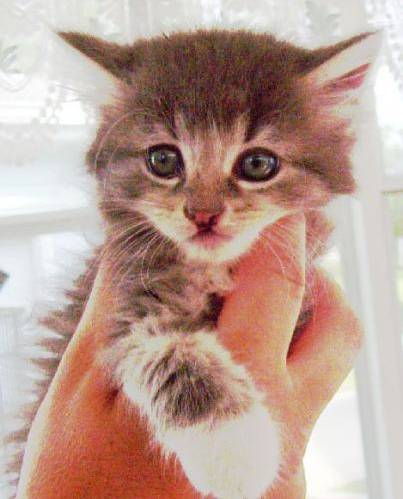

In [11]:
# Lets look at one of our images from our training set to make sure we did the above step correctly
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/cat-dog/training_set/training_set/cats/cat.100.jpg')
cv2_imshow(img)

###Importing additional libraries and look at more of our data

In [13]:
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D

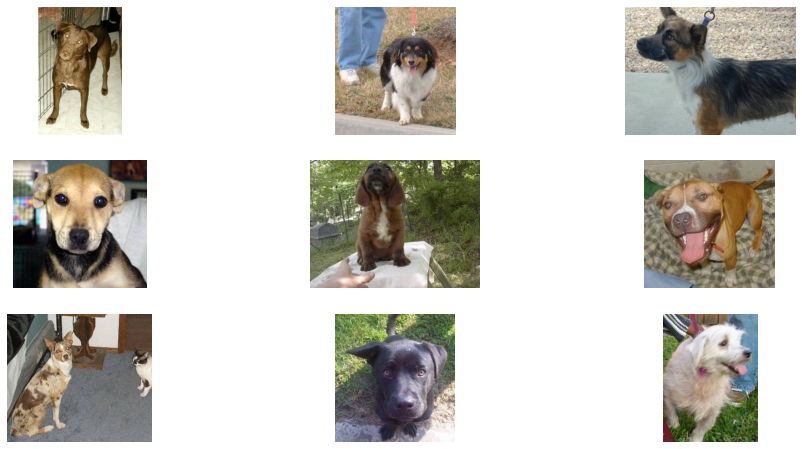

In [14]:
# Lets look at 9 pictures of dogs in our training set
f, ax = plt.subplots(figsize = (16,8))

for i in range(1,10):
  img = cv2.imread('/content/cat-dog/training_set/training_set/dogs/dog.' + str(i) + '.jpg')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.subplot(3,3,i)
  plt.imshow(img)
  plt.axis('off')

plt.show()

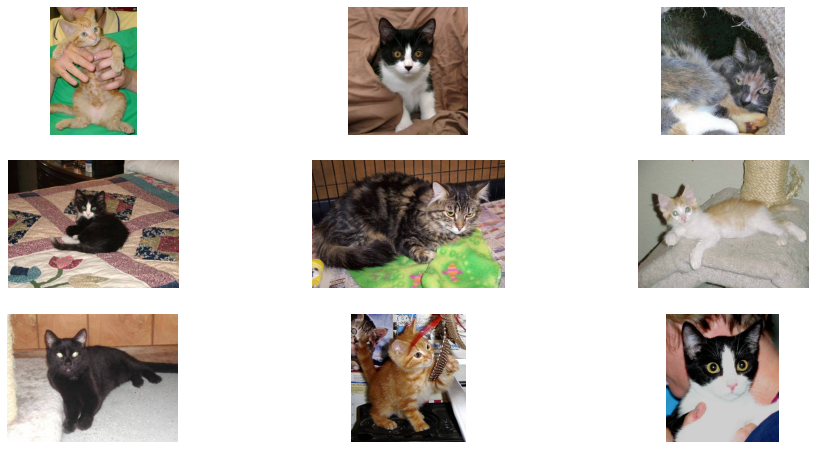

In [21]:
# Lets do the same thing but for cats in our dataset

f, ax = plt.subplots(figsize = (16,8))

for i in range(1,10):
  img = cv2.imread('/content/cat-dog/training_set/training_set/cats/cat.100' + str(i) + '.jpg')
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.subplot(3,3,i)
  plt.imshow(img)
  plt.axis('off')

plt.show()



### Data Preprocessing

#### Creating the training and test set

As we can see our images are broken into the training and test set. In order to use these images we will be using a keras preprocessing function called ImageDataGenerator

In [25]:
from keras.preprocessing.image import ImageDataGenerator

# The block below helps with data augmentation and reduces the change of overfitting the training set. 
train_datagen = ImageDataGenerator(
    rescale = 1./255,  
    shear_range = 0.2, 
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_set = train_datagen.flow_from_directory('/content/cat-dog/training_set',
                                                 target_size = (64,64), batch_size = 32,
                                                 class_mode = 'binary') # class_mode binary because we only have two classes cat or dog
      
test_set = test_datagen.flow_from_directory('/content/cat-dog/test_set', target_size = (64,64),
                                            batch_size = 32, class_mode = 'binary'
                                            )



Found 8005 images belonging to 1 classes.
Found 2023 images belonging to 1 classes.


### Builing the Model

In [30]:
model = Sequential()

model.add(Convolution2D(filters = 32, kernel_size=(3,3), strides = 1, padding = 'same', 
                        input_shape = (64,64,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))
model.add(BatchNormalization())

model.add(Convolution2D(filters = 32, kernel_size = (3,3), strides = 1,
                        padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

Compiling Model

In [32]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Fitting and Training the Model

In [33]:
model.fit_generator(train_set, steps_per_epoch=100, epochs = 2, verbose = 1,
                    validation_data = test_set , validation_steps = 50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
100/100 [==============================] - 31s 301ms/step - loss: 0.0202 - accuracy: 0.9984 - val_loss: 2.9817e-08 - val_accuracy: 1.0000
Epoch 2/2
100/100 [==============================] - 30s 299ms/step - loss: 2.5736e-32 - accuracy: 1.0000 - val_loss: 7.7215e-10 - val_accuracy: 1.0000
